# Mecánica de Medios Continuos
## Por Jorge I. Zuluaga
### Cuadernos de exploración numérica

In [215]:
import numpy as np
import matplotlib.pyplot as plt

## Un océano plano paralelo

Queremos en este Notebook resolver las ecuaciones de un océano plano paralelo asumiendo distintas situaciones astrofísicas. Las ecuaciones son:

$$
\begin{aligned}
& \frac{d \rho}{d z}=-\frac{\rho(z)^2 g(z)}{K(z)} \\
& \frac{d p}{d z}=-\rho g(z)
\end{aligned}
$$

## Solución ideal

En el caso ideal en el que se asume que el agua es incompresible, ie. $K(z)\rightarrow \infty$, la solución a estas ecuaciones es bien conocida:

$$
\rho(z) = \rho_0
$$
$$
p(z) = p_0 - \rho_0 g_0 z
$$

Supongamos que el océano es de agua y está en la Tierra:

In [216]:
g0 = 9.8 # m/s^2
rho0 = 1000 # kg/m^3
p0 = 1.01e5 # Pa

La presión y la densidad como función de la profundidad será:

In [217]:
zs = np.linspace(0,-11000,1000)
ps_inc = p0 - rho0*g0*zs
rhos_inc = rho0*np.ones_like(ps_inc)

Un gráfico de estos campos será:

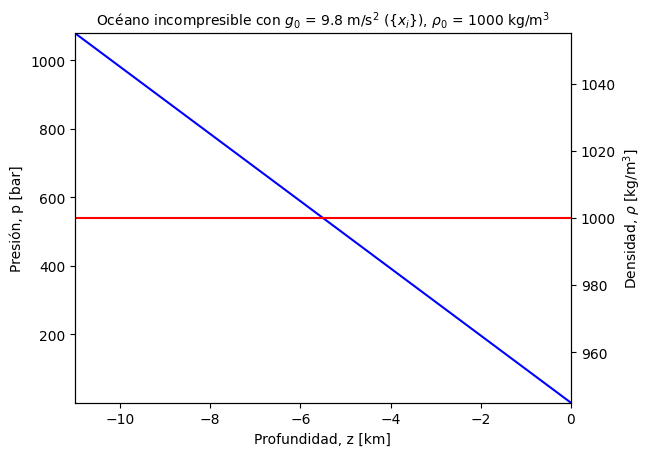

In [218]:
fig, ax = plt.subplots(1,1)
ax.plot(zs/1e3, ps_inc/1e5, color='b')
ax.set_xlabel("Profundidad, z [km]")
ax.set_ylabel("Presión, p [bar]")

ax2 = ax.twinx()
ax2.plot(zs/1e3, rhos_inc, color = 'r')
ax2.set_ylabel(r"Densidad, $\rho$ [kg/m$^3$]")

ax.set_title(rf"Océano incompresible con $g_0$ = {g0} m/s$^2$ ({{$x_i$}}), $\rho_0$ = {rho0} kg/m$^3$",
             fontsize=10)

ax.margins(0)

### Océano compresible con gravedad y compresibilidad constante

Si se asume que la gravedad es constante, $g(z) = g_0$ y que el módulo de compresibilidad también lo es, $K(z) = K_0$, la solución de estas ecuaciones diferenciales produce:

$$
\rho(z) = \frac{\rho_0}{\left(1+\frac{\rho_0 g_0 z}{K_0}\right)}
$$
$$
p(z) = p_0 - K_0 \ln\left(1+\frac{\rho_0 g_0 z}{K_0}\right)
$$

**Ejercicio**: Haga un gráfico en el que muestre la variación de la presión y la densidad del agua asumiendo $K_0 = 2.21$ GPa y compárelo con la variación en la presión y densidad del caso incompresible:  

In [219]:
K0 = 2.21e9
rhos_comp = rho0/(1+rho0*g0*zs/K0)
ps_comp = p0 - K0*np.log(1+rho0*g0*zs/K0)

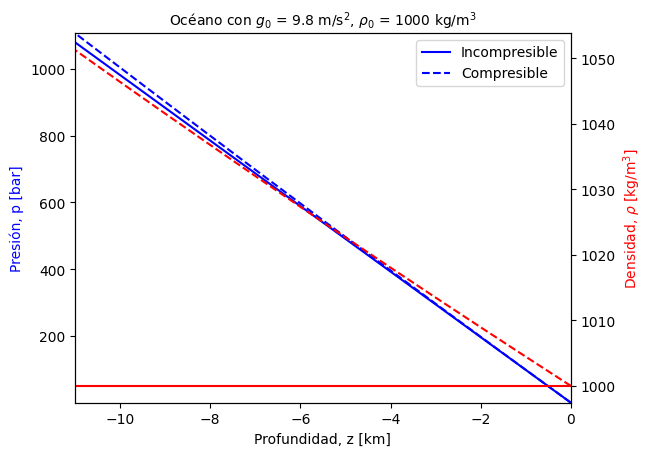

In [220]:
fig, ax = plt.subplots(1,1)
ax.plot(zs/1e3, ps_inc/1e5, color='b',label='Incompresible')
ax.plot(zs/1e3, ps_comp/1e5, 'b--',label='Compresible')
ax.set_xlabel("Profundidad, z [km]")
ax.set_ylabel("Presión, p [bar]",color='b')
ax.legend()

ax2 = ax.twinx()
ax2.plot(zs/1e3, rhos_inc, color = 'r')
ax2.plot(zs/1e3, rhos_comp, 'r--')
ax2.set_ylabel(r"Densidad, $\rho$ [kg/m$^3$]",color='r')

ax.set_title(rf"Océano con $g_0$ = {g0} m/s$^2$, $\rho_0$ = {rho0} kg/m$^3$",
             fontsize=10)

ax.margins(0)

## Solución numérica

Podemos reproducir los resultados anteriores, si escribimos numéricamente las ecuaciones diferenciales:

In [221]:
def oceano_compresible(Y,z,g=lambda z:9.8,K=lambda p:np.inf):
  rho,p = Y
  drhodz = -rho**2*g(z)/K(p)
  dpdz = -rho*g(z)
  return drhodz,dpdz

**Ejercicio**: Resuelva numéricamente con odeint el sistema de ecuaciones anterior en el caso de un oceano con compresibilidad constante $K_0$ y grafique la presión y la densidad como función de la profundidad. Comparela con el resultado anterior:

In [222]:
# Así serían las funciones que hay que pasar a la ecuación
g = lambda z:g0
K = lambda z:K0

# Cómo son las condiciones iniciales
Y0s = [rho0,p0]

from scipy.integrate import odeint
Ys = odeint(oceano_compresible,Y0s,zs,args=(g,K))
rhos_comp_num = Ys[:,0]
ps_comp_num = Ys[:,1]

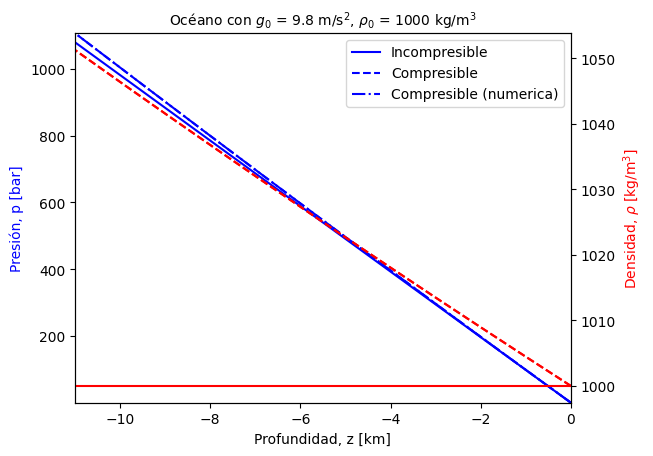

In [223]:
fig, ax = plt.subplots(1,1)
ax.plot(zs/1e3, ps_inc/1e5, color='b',label='Incompresible')
ax.plot(zs/1e3, ps_comp/1e5, 'b--',label='Compresible')
ax.plot(zs/1e3, ps_comp_num/1e5, 'b-.',label='Compresible (numerica)')
ax.set_xlabel("Profundidad, z [km]")
ax.set_ylabel("Presión, p [bar]",color='b')
ax.legend()

ax2 = ax.twinx()
ax2.plot(zs/1e3, rhos_inc, color = 'r')
ax2.plot(zs/1e3, rhos_comp, 'r--')
ax2.plot(zs/1e3, rhos_comp_num, 'r--')
ax2.set_ylabel(r"Densidad, $\rho$ [kg/m$^3$]",color='r')

ax.set_title(rf"Océano con $g_0$ = {g0} m/s$^2$, $\rho_0$ = {rho0} kg/m$^3$",
             fontsize=10)

ax.margins(0)

## Compresibilidad variable

La compresibilidad del agua cambia con la presión, eso agrega una complejidad mayor al cálculo. A continuación hay una función que da la compresibilidad del agua como función de la presión:

Text(0, 0.5, 'Módulo de Compresibilidad [GPa]')

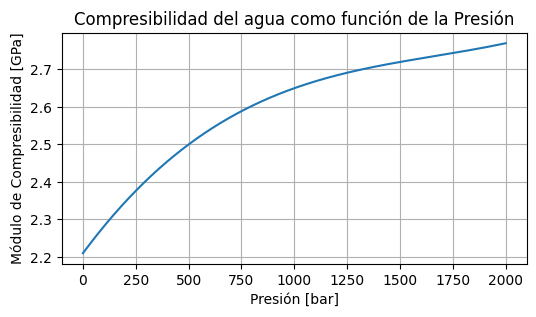

In [224]:
def K_water(p):
  """Presion en pascales
  """
  a = 8e-17
  b = -4e-8
  c = 7.6
  d = 2.21e9

  K = a*p**3 + b*p**2 + c*p + d
  return K

plt.figure(figsize = (6,3))
ps = np.linspace(0,2e8,1000)
Ks = K_water(ps)
plt.plot(ps/1e5,Ks/1e9)
plt.grid()
plt.title("Compresibilidad del agua como función de la Presión")
plt.xlabel("Presión [bar]")
plt.ylabel("Módulo de Compresibilidad [GPa]")

Con esta ley podemos ver cómo se relaciona la presión y la densidad del agua si resolvemos la ecuación

$$
K = \rho \frac{dp}{d\rho}
$$
que se puede expresar como una ecuación diferencial así:

$$
\frac{d\rho}{dp} = \frac{\rho}{K(p)}
$$


Esta ecuación diferencial se puede implementar como una rutina en Python usando:

In [225]:
def ecuacion_estado(rho,p,K=lambda p:np.inf):
  drhodp = rho/K(p)
  return drhodp

**Ejercicio**: Resuelva esta ecuación diferencial para encontrar la manera como la densidad del agua varía con la presión en el rango de 0 (cuando la densidad es 1000 kg/m$^3$) a 2000 bares.

In [226]:
ps = np.linspace(1*1e5,50000*1e5,1000)
Y0s = [1000]
Ys = odeint(ecuacion_estado,Y0s,ps,args=(K_water,))
rhos = Ys[:,0]

Text(0.5, 0, '$\\rho$ [kg/m3]')

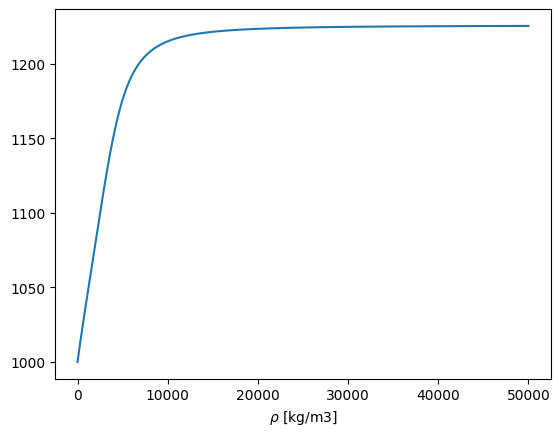

In [227]:
plt.plot(ps/1e5,rhos)
plt.xlabel(rf"p [bar]")
plt.xlabel(rf"$\rho$ [kg/m3]")

## Océano con compresibilidad variable

Vamos ahora a hacer un modelo del océano con compresibilidad variable. Para ello resolveremos las ecuaciones del océano usando la rutina `K_water` que vimos antes.

**Ejercicio**: Haga un gráfico de densidad y presión como función de la profundidad del agua asumiendo compresibilidad variable del agua, y compárelo con el obtenido con el modelo incompresible y con el modelo de compresibilidad constante.

In [228]:
# Así serían las funciones que hay que pasar a la ecuación
g = lambda z:g0
K = K_water

# Cómo son las condiciones iniciales
Y0s = [rho0,p0]

from scipy.integrate import odeint
Ys = odeint(oceano_compresible,Y0s,zs,args=(g,K))
rhos_comp_num = Ys[:,0]
ps_comp_num = Ys[:,1]

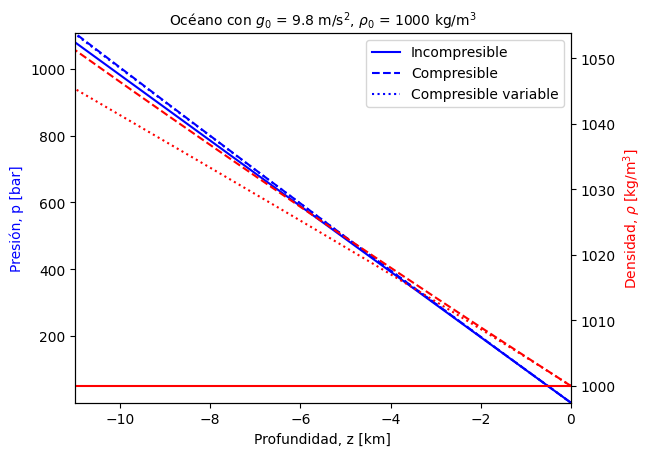

In [229]:
fig, ax = plt.subplots(1,1)
ax.plot(zs/1e3, ps_inc/1e5, color='b',label='Incompresible')
ax.plot(zs/1e3, ps_comp/1e5, 'b--',label='Compresible')
ax.plot(zs/1e3, ps_comp_num/1e5, 'b:',label='Compresible variable')
ax.set_xlabel("Profundidad, z [km]")
ax.set_ylabel("Presión, p [bar]",color='b')
ax.legend()

ax2 = ax.twinx()
ax2.plot(zs/1e3, rhos_inc, color = 'r')
ax2.plot(zs/1e3, rhos_comp, 'r--')
ax2.plot(zs/1e3, rhos_comp_num, 'r:')
ax2.set_ylabel(r"Densidad, $\rho$ [kg/m$^3$]",color='r')

ax.set_title(rf"Océano con $g_0$ = {g0} m/s$^2$, $\rho_0$ = {rho0} kg/m$^3$",
             fontsize=10)

ax.margins(0)

## Gravedad variable

¿Qué pasa si ahora incluímos una dependencia de la gravedad con la altura?.  La gravedad en un planeta en función del radio y la profundidad esta dada por:

$$
g(z) = \frac{G M}{(R+z)^2}
$$
Si tomamos como referencia la gravedad superficial:

$$
g(z) = g_0 \frac{R^2}{(R+z)^2} = \frac{g_0}{(1+z/R)^2}
$$

**Ejercicio**: Usando $R=6371$ km, resuelva las ecuaciones del océano con gravedad variable y con compresibilidad variable y compárelas con los casos: compresibilidad constante-gravedad constante, compresibilidad variable-gravedad variable.

In [230]:
R = 6371e3 # m

In [231]:
# Así serían las funciones que hay que pasar a la ecuación
g = lambda z:g0/(1+z/R)**2
K = K_water

# Cómo son las condiciones iniciales
Y0s = [rho0,p0]

from scipy.integrate import odeint
Ys = odeint(oceano_compresible,Y0s,zs,args=(g,K))
rhos_comp_gz_num_e = Ys[:,0]
ps_comp_gz_num_e = Ys[:,1]

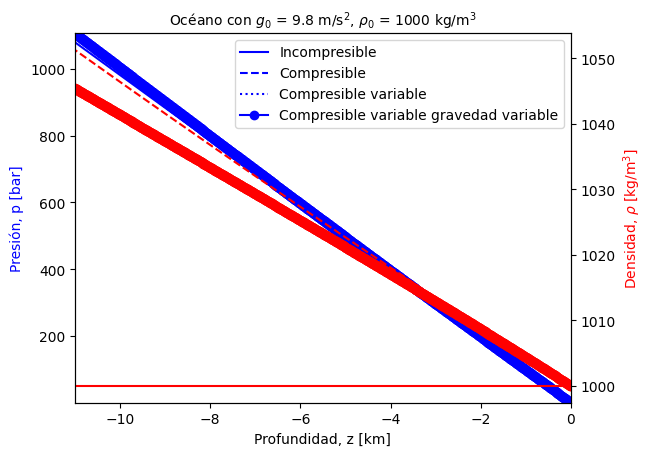

In [232]:
fig, ax = plt.subplots(1,1)
ax.plot(zs/1e3, ps_inc/1e5, color='b',label='Incompresible')
ax.plot(zs/1e3, ps_comp/1e5, 'b--',label='Compresible')
ax.plot(zs/1e3, ps_comp_num/1e5, 'b:',label='Compresible variable')
ax.plot(zs/1e3, ps_comp_gz_num_e/1e5, 'bo-',label='Compresible variable gravedad variable')
ax.set_xlabel("Profundidad, z [km]")
ax.set_ylabel("Presión, p [bar]",color='b')
ax.legend()

ax2 = ax.twinx()
ax2.plot(zs/1e3, rhos_inc, color = 'r')
ax2.plot(zs/1e3, rhos_comp, 'r--')
ax2.plot(zs/1e3, rhos_comp_gz_num_e, 'ro')
ax2.set_ylabel(r"Densidad, $\rho$ [kg/m$^3$]",color='r')

ax.set_title(rf"Océano con $g_0$ = {g0} m/s$^2$, $\rho_0$ = {rho0} kg/m$^3$",
             fontsize=10)

ax.margins(0)

## Estado del agua

¿Seguirá siendo el agua líquida a las presiones características del fondo de estos océanos? Para ello necesitamos el diagrama de fase del agua:

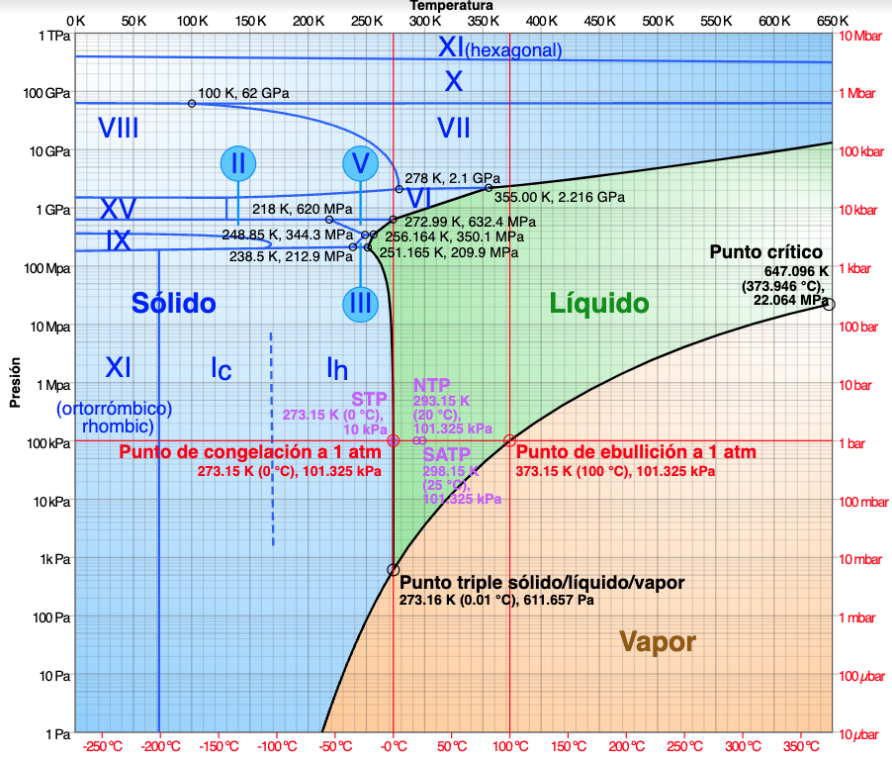

Si asumimos que la temperatura del agua es cercana a 0 C, vemos que con 620 MPa, el agua debe haber hecho una transición a Hielo VI, es decir, en el fondo de estos océanos hay hielo y no agua líquida. ¿En qué condiciones se produce esta situación?

### Oceanos extrasolares

Podríamos ver si un planeta con una masa mayor que la Tierra o un océano más profundo (los denominados *ocean worlds* o bien *hycean planets*) puede tener hielo en el fondo. Para ello podemos integrar las ecuaciones del oceano variando la masa o la profundidad del oceano.

**Ejercicio**: Manteniendo la máxima profundidad del océano en 10 km, aumente la masa del planeta entre 1 y 10 masas terrestres. Integre la ecuación del océano con compresibilidad variable. Para el radio del océano suponga que el radio escala con la fórmula:

$$
R = R_\oplus\left(\frac{M}{M_\oplus}\right)^{1/3}
$$

Haga un gráfico de la presión en el fondo del océano como función de la masa del planeta. ¿Se alcanza el valor crítico para la transición al hielo en alguna masa?. Aumente la profundidad del océano hasta que se alcance la condición para que haya hielo en 1 masa terrestre.

In [233]:
Ms = np.linspace(1,10,100)
Rs = Ms**(1/3)
g0_exo = g0*Ms/Rs**2

Text(0, 0.5, 'p ocean bottom [bar]')

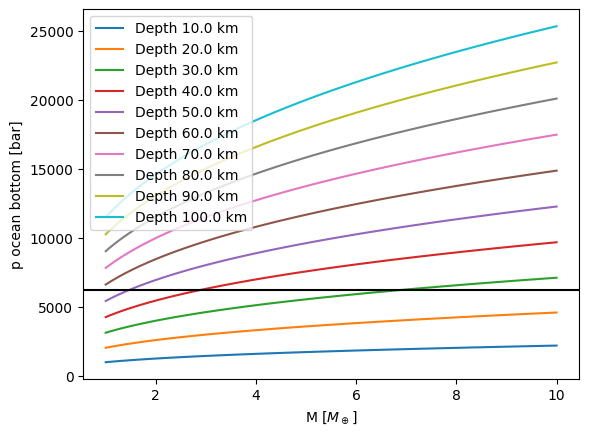

In [234]:
for H in np.linspace(10,100,10):
  zs_oe = np.linspace(0,-H*1e3,1000) # 100 km de profundidad
  ps_fondo = []
  for i in range(100):
    # Así serían las funciones que hay que pasar a la ecuación
    g = lambda z:g0_exo[i]/(1+z/(Rs[i]*R))**2
    K = K_water

    # Cómo son las condiciones iniciales
    Y0s = [rho0,p0]

    from scipy.integrate import odeint
    Ys = odeint(oceano_compresible,Y0s,zs_oe,args=(g,K))
    rhos_comp_gz_num = Ys[:,0]
    ps_comp_gz_num = Ys[:,1]

    ps_fondo += [ps_comp_gz_num[-1]]

  ps_fondo = np.array(ps_fondo)

  plt.plot(Ms,ps_fondo/1e5,label=f"Depth {H} km")

plt.axhline(6200,color='k')
plt.legend()
plt.xlabel(r"M [$M_\oplus$]")
plt.ylabel(r"p ocean bottom [bar]")

### Oceanos de lunas del sistema solar

Vamos a hacer un modelo del océano interior de la Luna Europa de Júpiter. Esta Luna tiene una corteza de hielo con 20 km de espesor y se supone que la profundidad de su océano interior es de 110 km. La gravedad superficial de Europa es $g_0=1.33$ m/s$^2$ y su radio es de 1560 km.


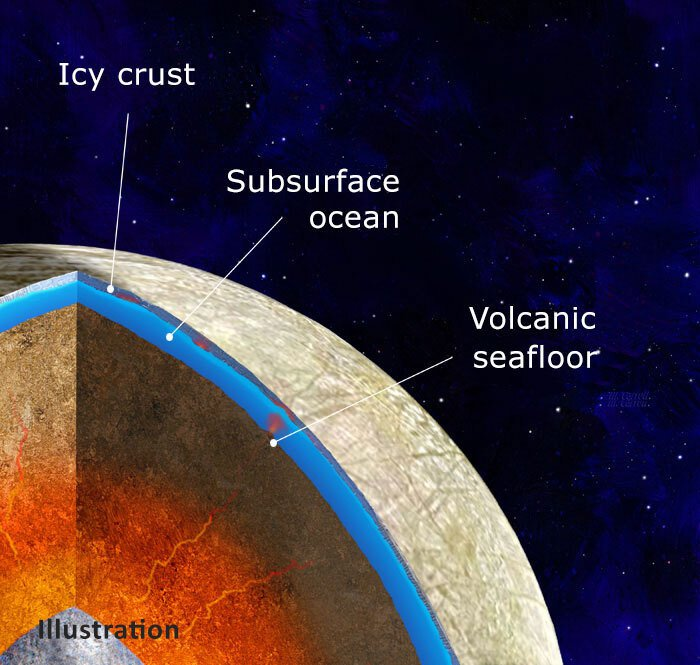


Queremos encontrar la presión en el fondo del océano. Para ello necesitamos integrar la ecuación del océano, primero para la corteza de hielo y luego para el oceano interior:

**Ejercicio E1**: Usando un modelo de gravedad variable y compresibilidad constante e igual a $K_0=10.4$ GPa (compresibilidad del hielo) calcule resolviendo las ecuaciones del océano, la presión en el fondo de la capa de hielo de Europa. ¿A qué profundidad en el oceano de la Tierra corresponde esa presión?

Primero definamos las variables de nuestra luna

In [235]:
K0_H = 10.4e9 # Pa (Compresibilidad del hielo)
E_H = 20e3 # m (Espesor del hielo de la corteza)
Pr_O = 110e3 # m (Profundidad del océano interior despues del hielo)
g0 = 1.33 # m/s^2 (Gravedad en la superficie)
RL = 1560e3 # m (Radio de la luna)

In [236]:
# Definamos una función para nuestra gravedad en función de z
g = lambda z:g0/(1+z/R)**2

# Condiciones Iniciales
p0 = 0 # Ya que la atmosfera de Europa es muy tenue y no ejerce practicamente presión
rho0 = 917 # kg/m^3 (Densidad del hielo) (Según resultados de internet)

Y0s = [rho0, p0] # Arreglo con las condiciones iniciales

Solucionando el problema

In [237]:
zs_e = np.linspace(0, -E_H, 1000) # 20 km de profundidad

# Definimos la ecuación diferencial
def compresibilidad_constante_gravedad_variable(Y, z, g = lambda z:g0/(1+z/RL)**2, K=lambda p:K0_H):
    rho,p = Y
    drhodz = -rho**2*g(z)/K(p)
    dpdz = -rho*g(z)
    return drhodz,dpdz

# Solucionando con odeint
Ys = odeint(compresibilidad_constante_gravedad_variable, Y0s, zs_e, args=(g, K))

# Obteniendo los valores de densidad y presión
rhos_num = Ys[:,0]
ps_num = Ys[:,1]

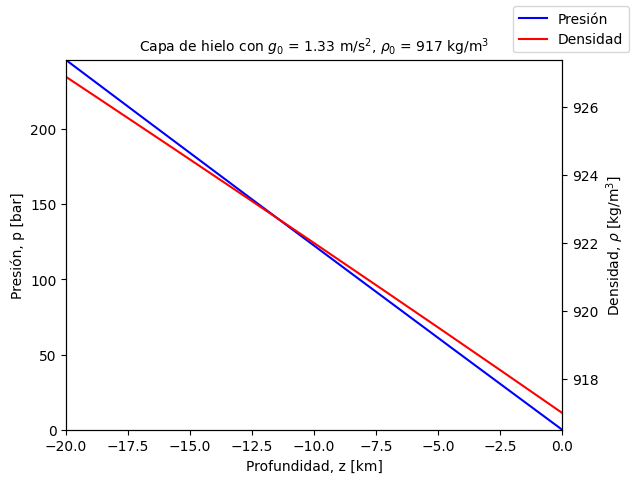

In [238]:
# Grafiquemos nuestros resultados de la integración numérica
fig, ax = plt.subplots(1,1)
ax.plot(zs_e/1e3, ps_num/1e5, color='b', label='Presión')
ax.set_xlabel("Profundidad, z [km]")
ax.set_ylabel("Presión, p [bar]")

ax2 = ax.twinx()
ax2.plot(zs_e/1e3, rhos_num, color = 'r', label='Densidad')
ax2.set_ylabel(r"Densidad, $\rho$ [kg/m$^3$]")

ax.set_title(rf"Capa de hielo con $g_0$ = {g0:.2f} m/s$^2$, $\rho_0$ = {rho0:.0f} kg/m$^3$",
             fontsize=10)

ax.margins(0)
fig.legend()

¿A qué profundidad en el oceano de la Tierra corresponde esa presión?

In [239]:
print(f"La presión en el fondo de la capa de Hielo  de Europa es: {ps_num[-1]/1e5:.2f} bar")

# Ahora veamos a que profundidad del oceano corresponde esta presión
presion_mas_cercana = min(ps_comp_gz_num_e, key=lambda x: abs(x - ps_num[-1])) 
closest_index = list(ps_comp_gz_num_e).index(presion_mas_cercana)

print(f"""\nLa profundidad en el oceano de la tierra que corresponde más o menos 
a la presión en el fondo de la capa de hielo de Europa es: {zs[closest_index]/1e3:.3f} [km]""")

La presión en el fondo de la capa de Hielo  de Europa es: 246.02 bar

La profundidad en el oceano de la tierra que corresponde más o menos 
a la presión en el fondo de la capa de hielo de Europa es: -2.488 [km]



Debajo de la capa de hielo, esta el agua líquida. Para encontrar el perfil de presión y densidad, necesitamos encontrar el valor inicial de la densidad del agua a la presión debajo del hielo.

**Ejercicio E2**: Use la ecuación de estado del agua:

In [240]:
# Función de la ecuación de estado del agua
def ecuacion_estado(rho, p, K_AL):
    drhodp = rho / K_AL
    return drhodp

# Parámetros iniciales
rho0 = 1000  # Densidad inicial del agua a 1 atm en kg/m^3
p0 = 1e5  # Presión inicial en Pascales (1 atm)
pf = ps_num[-1]  # Presión final en Pascales (Presión del fondo de la capa de hielo)
K_AL = 2.21e9  # Compresibilidad aproximada del agua liquida en Pascales 

# Definir las presiones para la integración
p = np.linspace(p0, pf, 100)  # Rango de presiones desde p0 hasta pf

# Resolver la ecuación diferencial
rho = odeint(ecuacion_estado, rho0, p, args=(K_AL,))

# La densidad del agua a la presión final
rho_final = rho[-1][0]

print(f'La densidad del agua liquida a {pf/1e5:.2f} [ba] es aproximadamente {rho_final:.2f} kg/m^3')

La densidad del agua liquida a 246.02 [ba] es aproximadamente 1011.15 kg/m^3


**Ejercicio E3**: Integre la ecuación del océano para encontrar la presión en el fondo del océano de Europa y evaluar si se alcanzan las condiciones para que haya Hielo VI.

In [241]:
# Condiciones Iniciales
p0 = pf 
rho0 = rho_final # kg/m^3 densidad del agua a la presion del fondo de la capa de hielo

Y0s = [rho0, p0] # Arreglo con las condiciones iniciales

In [242]:
# Definir funciones de gravedad y compresibilidad
g = lambda z: g0 / (1 + z / RL) ** 2
K = lambda p: K_AL

# Valores iniciales
zs_e = np.linspace(0, -Pr_O, 1000)  # 110 km de profundidad

# Definimos la ecuación diferencial
def compresibilidad_constante_gravedad_variable(Y, z, g, K):
    rho, p = Y
    drhodz = -rho**2 * g(z) / K(p)
    dpdz = -rho * g(z)
    return [drhodz, dpdz]

# Solucionando con odeint
Ys = odeint(compresibilidad_constante_gravedad_variable, Y0s, zs_e, args=(g, K))

# Obteniendo los valores de densidad y presión
rhos_num = Ys[:, 0]
ps_num = Ys[:, 1]

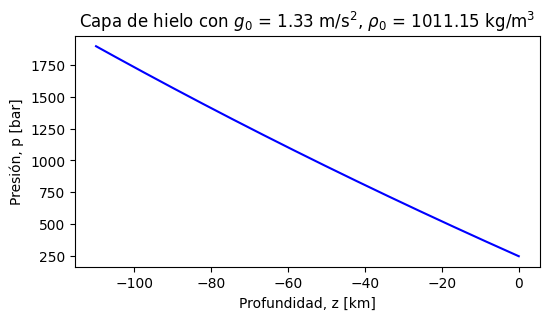

In [243]:
# Grafiquemos la presión en función de la altura para la capa de hielo
plt.figure(figsize=(6,3))
plt.plot(zs_e/1e3, ps_num/1e5, 'b')

# Agreguemos algunos detalles
plt.xlabel("Profundidad, z [km]")
plt.ylabel("Presión, p [bar]")
plt.title(rf"Capa de hielo con $g_0$ = {g0} m/s$^2$, $\rho_0$ = {rho0:.2f} kg/m$^3$")
plt.show()

No se alcanza la presión para conseguir el hielo IV, ya que para este se necesitan cerca de 10kbar, sin emabrgo, como se observa en el gráfico la presión del fondo de Europa solo se alcanza una presión cercana a los 2 kbar

**Ejercicio**: Repita lo anterior pero en el caso de la Luna Ganimedes: $g_0 = 1.428$ m/s$^2$, $R = 2634$ km, profundidad corteza de hielo = 150 km, profundidad océano interior = 100 km.

In [244]:
K0_H = 10.4e9 # Pa (Compresibilidad del hielo)
E_H = 150e3 # m (Espesor del hielo de la corteza)
Pr_O = 100e3 # m (Profundidad del océano interior despues del hielo)
g0 = 1.428 # m/s^2 (Gravedad en la superficie)
RL = 100e3 # m (Radio de la luna)

In [245]:
# Definamos una función para nuestra gravedad en función de z
g = lambda z:g0/(1+z/R)**2

# Condiciones Iniciales
p0 = 0 # Ya que la atmosfera de Europa es muy tenue y no ejerce practicamente presión
rho0 = 917 # kg/m^3 (Densidad del hielo) (Según resultados de internet)

Y0s = [rho0, p0] # Arreglo con las condiciones iniciales

Solucionando el problema

In [246]:
zs_e = np.linspace(0, -E_H, 1000) # 20 km de profundidad

# Definimos la ecuación diferencial
def compresibilidad_constante_gravedad_variable(Y, z, g = lambda z:g0/(1+z/RL)**2, K=lambda p:K0_H):
    rho,p = Y
    drhodz = -rho**2*g(z)/K(p)
    dpdz = -rho*g(z)
    return drhodz,dpdz

# Solucionando con odeint
Ys = odeint(compresibilidad_constante_gravedad_variable, Y0s, zs_e, args=(g, K))

# Obteniendo los valores de densidad y presión
rhos_num = Ys[:,0]
ps_num = Ys[:,1]

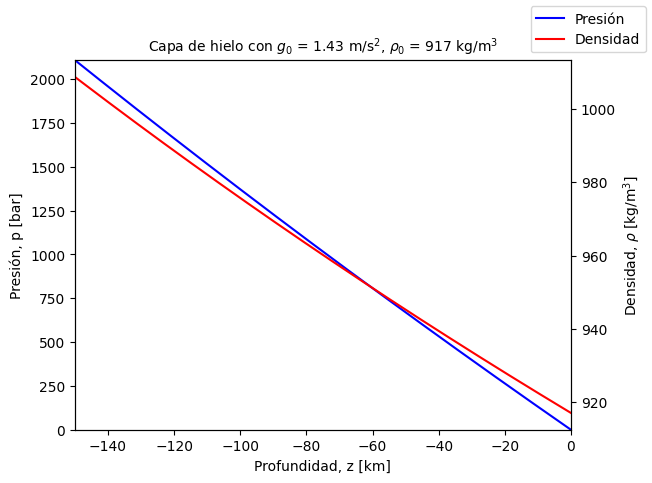

In [247]:
# Grafiquemos nuestros resultados de la integración numérica
fig, ax = plt.subplots(1,1)
ax.plot(zs_e/1e3, ps_num/1e5, color='b', label='Presión')
ax.set_xlabel("Profundidad, z [km]")
ax.set_ylabel("Presión, p [bar]")

ax2 = ax.twinx()
ax2.plot(zs_e/1e3, rhos_num, color = 'r', label='Densidad')
ax2.set_ylabel(r"Densidad, $\rho$ [kg/m$^3$]")

ax.set_title(rf"Capa de hielo con $g_0$ = {g0:.2f} m/s$^2$, $\rho_0$ = {rho0:.0f} kg/m$^3$",
             fontsize=10)

ax.margins(0)
fig.legend()
plt.show()

¿A qué profundidad en el oceano de la Tierra corresponde esa presión?

In [248]:
print(f"La presión en el fondo de la capa de Hielo  de Europa es: {ps_num[-1]/1e5:.2f} bar")

# Ahora veamos a que profundidad del oceano corresponde esta presión
presion_mas_cercana = min(ps_comp_gz_num_e, key=lambda x: abs(x - ps_num[-1])) 
closest_index = list(ps_comp_gz_num_e).index(presion_mas_cercana)

print(f"""\nLa profundidad en el oceano de la tierra que corresponde más o menos 
a la presión en el fondo de la capa de hielo de Europa es mayor a  {zs[closest_index]/1e3:.3f} [km]""")

La presión en el fondo de la capa de Hielo  de Europa es: 2109.09 bar

La profundidad en el oceano de la tierra que corresponde más o menos 
a la presión en el fondo de la capa de hielo de Europa es mayor a  -11.000 [km]


Es mayor a la presión en el fondo de la fosa de las marianas

In [249]:
# Función de la ecuación de estado del agua
def ecuacion_estado(rho, p, K_AL):
    drhodp = rho / K_AL
    return drhodp

# Parámetros iniciales
rho0 = 1000  # Densidad inicial del agua a 1 atm en kg/m^3
p0 = 1e5  # Presión inicial en Pascales (1 atm)
pf = ps_num[-1]  # Presión final en Pascales (Presión del fondo de la capa de hielo)
K_AL = 2.21e9  # Compresibilidad aproximada del agua liquida en Pascales 

# Definir las presiones para la integración
p = np.linspace(p0, pf, 100)  # Rango de presiones desde p0 hasta pf

# Resolver la ecuación diferencial
rho = odeint(ecuacion_estado, rho0, p, args=(K_AL,))

# La densidad del agua a la presión final
rho_final = rho[-1][0]

print(f'La densidad del agua liquida a {pf/1e5:.2f} [ba] es aproximadamente {rho_final:.2f} kg/m^3')

La densidad del agua liquida a 2109.09 [ba] es aproximadamente 1100.09 kg/m^3
